# Data Preprocessing on Real World (Titanic) Dataset
                                        By Nabeel Ahmed

# Agenda

This tutorial is aimed at beginners, especially those who are both new to machine learning/data science as well as python. 


1. Exploratory Data Analysis (EDA) - understanding the data and the underlying interactions between the different variables
2. Data Pre-processing - preparing the data for modelling


The goal of the model is to predict whether a passenger survived the Titanic disaster, given their age, class and a few other features.


# Loading Libraries
Not all python capabilities are loaded to your working environment by default (even if they exist and are installed on your computer), Therefore, we would need to import every library we are going to use. numpy and pandas are probably the most commonly used libraries. 

Numpy is requried whenever calculations are required (calculating means, medians, sqaure root, etc.).
pandas is a great module for data processing and data frames. 

We can choose alias names to our modules for the sake of convenience (numpy --> np, pandas --> pd)

In [52]:
!pip install seaborn

In [53]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [54]:
import seaborn as sns

# Loading the data
We would use the pandas module to read the files. using the "read_csv" function. the files format is.csv (similar to .xls)

In the round brackets we have the path to where the data is saves i.e on Github

In [55]:
data = pd.read_csv('train.csv')      

# Exploratory Data Analysis

In [56]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [58]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Wait do you remeber the Problem Statement?

## If not it's useless moving forward.
- We have defined the problem statement to predict whether a person based on certain attributes is likely to survive the Titanic disaster or not.

## Let us explore the columns: 
* PassengerId - this is a just a generated Id
* Pclass - which class did the passenger ride - first, second or third
* Name - self explanatory
* Sex - male or female
* Age
* SibSp - were the passenger's spouse or siblings  with them on the ship
* Parch -  were the passenger's parents or children  with them on the ship
* Ticket - ticket number
* Fare - ticker price
* Cabin
* Embarked - port of embarkation
* Survived - did the passenger  survive the sinking of the Titanic?

**Note:** The whole goal is building a model that would predict the survival probability of a person, given their basic features.

# Exploratory Data Analysis (EDA)

After loading the data, let us examine it. It is usually not recommended to throw all the data into a predictive model without first understanding the data. this would often help us improving our model.

### Understanding Code below
The "len" function gives the length of whatever is the input, in that case our train data frame.

We can access a specific column in a data frame by specifying its name in square brackets. we can also filter the values we are interested in with a condition.

So the second line in the above cell should be understood as following: - "give me the number of people (rows) who survived ("survived = 1")

When we want to use the "equals" symbol in the context of a comparison\condition statement, we use "==" instead of "="

In [59]:
#Lets focus on problem Statement and start understanding Data first
print('Total number of passangers in the training data...', len(data))
print('Number of passangers in the training data who survived...', len(data[data['Survived'] == 1]))

Total number of passangers in the training data... 891
Number of passangers in the training data who survived... 342


In [60]:
#Understanding what we are actually predicting 
# Predictor Variable is  'Survived' -> based on given attributes
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Insight # 2
### What is the % of men and women who survived:

In [61]:
print('% of men who survived', 100*np.mean(data['Survived'][data['Sex']=='male']))

% of men who survived 18.890814558058924


In [62]:
np.mean(data['Survived'][data['Sex']=='male'])

0.18890814558058924

# Insight # 3
- Now, similarly, let's see what is the % of men and women who survived, and then by the same token with class and age:

In [63]:
# how many different classes we had
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [64]:
print('% of passengers who survived in first class', 100*np.mean(data['Survived'][data['Pclass'] == 1]))
print('% of passengers who survived in third class', 100*np.mean(data['Survived'][data['Pclass'] == 3]))

% of passengers who survived in first class 62.96296296296296
% of passengers who survived in third class 24.236252545824847


In [116]:
# Pclass - Survived
data[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


# Summary of all the variables

In [65]:
# Finding total # of rows and columns
data.shape

(891, 12)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
# Inspecting Cabin Column
data['Cabin']
# You can see NA values here. We have to deal with them before trainig our model

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

# Data Pre-processing

- Can our ML model deal with categorical variables like "High", "Low".. etc.
- Ofcourse not we are using mathematics and pure algorithms to train model so its important that we convert those categorical features into somewhat numeric.

### Any GUESSES what should we do?


## Non numeric features to numeric

- We will encode this feature: "male" = 1, "female" = 0

In [68]:
# This one line of code will help us encode "Sex" column
df2 = data.copy()
df2['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [69]:
df2['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [70]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

"""
Understanding lambda functtion:
The lambda function above is same as the user defined function below:

def fun(x):

    if x == 'male':
        return 1       
    else:
    return 0
    
- x is the argument in both user defined function and lambda function (i.e. def func(x): is same as lambda x:)
- if x == 'male':
    return 1
    
    of user defined function is same as
    
    1 if x == 'male' of lambda function
    
    The only difference here is - in lambda function the first return statement is placed before the condition and no 'return'
    keyword is used.
    
- After if statement the else part is similar in both cases the only difference is no 'return' keyword used.
[return keyword is not used in lambda function][lambda function is used only for small set of statements]

A youtube video on lambda function: https://www.youtube.com/watch?v=hYzwCsKGRrg

"""

The "apply" means "do that for each value in the column". the statement in the brackets should be read as following :"for every value in the column ("lambda x:") if it's a male then replace with 1, otherwise replace with 0

# Hey! I am NA value. You haven't dealt with me yet :(

## Dealing with Missing Values

Another common problem which has to be addressed is missing values. We can simply delete rows with missing values, but usually we would 'want to take advantage of as many data points as possible. Replacing missing values with zeros would not be a good idea - as age 0 or price 0 have actual meanings and that would change our data.

Therefore a good replacement value would be something that doesn't affect the data too much, such as the median or mean. the "fillna" function replaces every NaN (not a number) entry with the given input (the mean of the column in our case):

In [71]:
# This brings us to dealing with Missing Values
# Lets see once again the missing values in our dataset
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
# Lets handle each column in a different way
# Lets see Age. Can Age be 0 or -ve? No, ofcourse so how to handle missing values
# How about we take average of all ages and fill that missing value with avg.
# Well that's exacttly what we'll be doing
df2['Age'] = df2['Age'].fillna(np.mean(df2['Age']))

In [73]:
# Checking again
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Now, Lets handle missing values of Embarked Column

In [74]:
# Looking at frequency of each values in 'Embarked'
df2.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [75]:
emabark = df2['Embarked'].dropna()

In [76]:
df2[df2['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN


In [77]:
# while there can be many ways to deal NA values for this column
# we could have drop these NA values by dropping rows as data is less
# on the otther hand we can replace it with mode value
df2['Embarked'].fillna(df2['Embarked'].mode()[0], inplace=True)

In [78]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [51]:
df2['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
F33            3
              ..
E49            1
A36            1
T              1
B19            1
D11            1
Name: Cabin, Length: 147, dtype: int64

# Lets do Some Data Visualization

In [79]:
df2.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000


In [103]:
def bar_plot(variable):
    """
    input : variable ex : "Sex"
    output : bar plot & value count  
    """
    # get feature
    var = df2[variable]
    #count number of categorical variable (value/sample)
    varValue = var.value_counts()

    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue,color = "orange", edgecolor = "black", linewidth = 2)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    
    
    

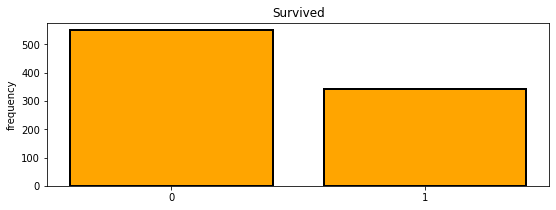

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


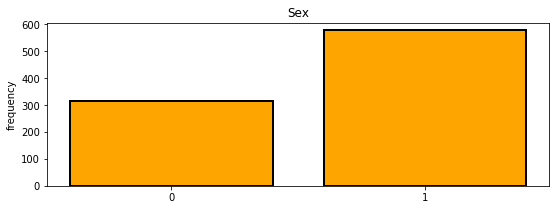

Sex: 
 1    577
0    314
Name: Sex, dtype: int64


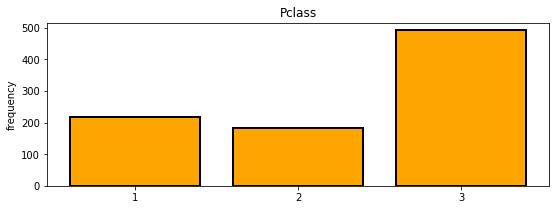

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


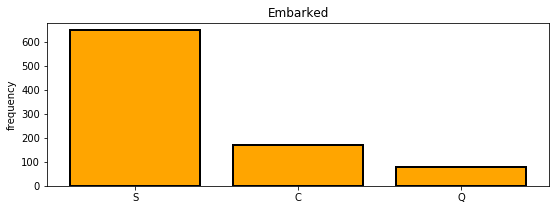

Embarked: 
 S    646
C    168
Q     77
Name: Embarked, dtype: int64


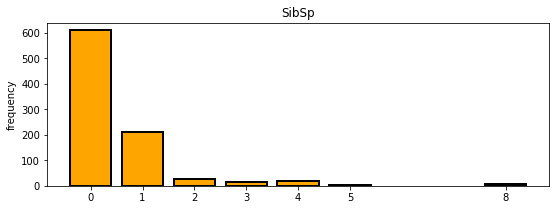

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


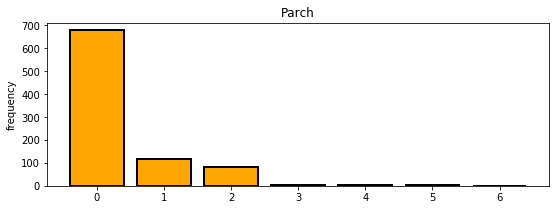

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [104]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

In [113]:
# Visualizing Numeric Columns

def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(df2[variable], color='red')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist ".format(variable))
    plt.show()

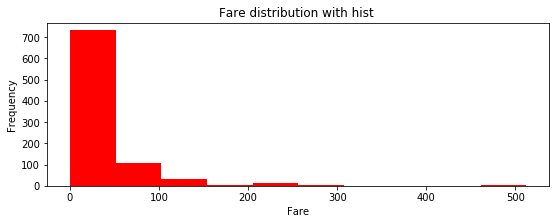

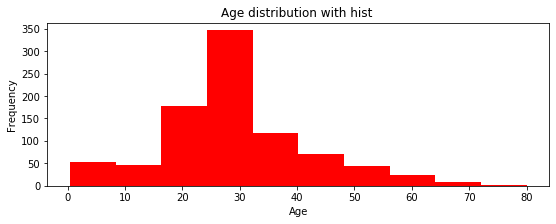

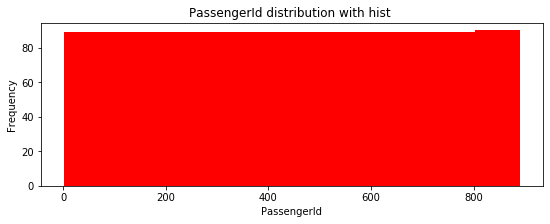

In [114]:
numericVar = ["Fare","Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

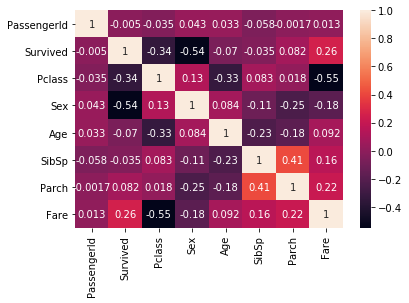

In [81]:
# Understanding cor relation
sns.heatmap(df2.corr(), annot=True)

In [91]:
# sns.regplot(x='Age',y='Pclass', data=df2)

## Omit irrelevant columns
Let us only take the columns we find relevant. ID columns are never relevant (or at least should not be, if the data was sampled randomly). As our model is very simple, let us also omit the Ticket number, Cabin, ID and Name although more sophisticated models can definitely take advantage of them

In [92]:
final_df = df2[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [95]:
final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


## Hurray!!!
- You as a Data Scientist have finally accomplish the task of cleaning and preapring Dataset for Modelling.
- Now lets just do one final thing and wait for next session to get on with preparing our very first MODEL!

## Separating input variables (X) and target variable (y)
- Until now we have prepared our entire dataset as a whole. But wait do yoiu still remember our problem statement?
- Yes, our aim is to predict whether a person will survive or not? Right. So it only makes sense that we isolate survive column from rest of the features and train our model in a way that if we give certain features it predicts whether a person will survive or not.
- These seprating variables is called input and target variables.

- In this problem our target variable is 'Survived column' while all the rest of the data is our input features.
- Lets make 2 variables and seperate this info

Y has the labels, our answers column. X is all the rest of the data - the features, without the labels (The survived column). This sepration would hoepfully be clearer in a few cells

In [96]:
X = final_df.drop('Survived', axis = 1)
y = final_df['Survived']

In [98]:
X.shape

(891, 6)

In [99]:
y.shape

(891,)

# Thank you So much!

- Hope you have enjoyed the notebook :)